## **Latar Belakang**

AWS SaaS Sales adalah perusahaan yang bergerak di bidang penjualan perangkat lunak sebagai layanan (SaaS) melalui platform Amazon Web Services (AWS). Perusahaan ini menyediakan berbagai solusi perangkat lunak yang dapat diakses secara online, memungkinkan pelanggan untuk mengelola bisnis mereka dengan lebih efisien dan efektif. Dengan memanfaatkan infrastruktur cloud AWS, AWS SaaS Sales menawarkan skalabilitas, keamanan, dan fleksibilitas yang tinggi bagi para pelanggannya.

## **Pernyataan Masalah**

Bagaimana tren penjualan dan profitabilitas AWS SaaS berubah dari waktu ke waktu (per bulan tiap tahun)?
- Apakah terdapat pola musiman atau periode tertentu yang menunjukkan peningkatan atau penurunan signifikan dalam kinerja penjualan?

Sejauh mana pemberian diskon memengaruhi profitabilitas penjualan?
- Apakah peningkatan diskon mendorong volume penjualan yang cukup untuk menutupi penurunan margin keuntungan, atau justru menyebabkan kerugian?

Bagaimana perilaku pelanggan dapat dikelompokkan menggunakan model LRFM (Length, Recency, Frequency, Monetary)?
- Segmen pelanggan mana yang memberikan kontribusi tertinggi terhadap penjualan, dan segmen mana yang berisiko menurun atau perlu strategi retensi khusus?

## **Tujuan Analisis**

Tujuan dari analisis ini mencakup:
- Mengidentifikasi trend penjualan dan profitabilitas berdasarkan waktu (per bulan pada setiap tahun).
- Mengidentifikasi pengaruh diskon terhadap profitabilitas penjualan.
- Menganalisis perilaku pelanggan berdasarkan segmen LRFM (Length, Recency, Frequency, Monetary).


## **Data**

Dalam dataset ini, terdapat 19 kolom dengan berbagai tipe data, yaitu numerik dan kategorikal. Berikut adalah deskripsi singkat dari setiap kolom dalam dataset:

1. Row ID: Identitas unik untuk setiap transaksi.

2. Order ID: Identitas unik untuk setiap pesanan.

3. Order Date: Tanggal ketika pesanan dilakukan.

4. Date Key: Representasi numerik dari tanggal pesanan (format YYYYMMDD).

5. Contact Name: Nama orang yang melakukan pesanan.

6. Country: Negara tempat pesanan dilakukan.

7. City: Kota tempat pesanan dilakukan.

8. Region: Wilayah tempat pesanan dilakukan.

9. Subregion: Sub-wilayah tempat pesanan dilakukan.

10. Customer: Nama perusahaan yang melakukan pesanan.

11. Customer ID: Identitas unik untuk setiap pelanggan.

12. Industry: Industri tempat pelanggan berada.

13. Segment: Segmen pelanggan (SMB, Strategic, Enterprise).

14. Product: Produk yang dipesan.

15. License: License key produk.

16. Sales: Total nilai penjualan dari transaksi.

17. Quantity: Jumlah item dalam transaksi.

18. Discount: Diskon yang diterapkan pada transaksi.

19. Profit: Laba dari transaksi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **Data Cleaning and Data Understanding**

#### **Info baris dan kolom dari dataset**

In [3]:
df.shape

(9994, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

#### **Cek missing value**

In [5]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak ada missing value.

#### **Standarisasi nama kolom**

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'date_key', 'contact_name',
       'country', 'city', 'region', 'subregion', 'customer', 'customer_id',
       'industry', 'segment', 'product', 'license', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

##### **Ubah row_id jadi index**
 karena row_id tidak memiliki nilai yang unik, maka row_id dapat dijadikan index.

In [7]:
df.set_index('row_id', inplace=True)
df.head()

,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,license,sales,quantity,discount,profit
row_id,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


#### **Cek unique value**

In [8]:
df.nunique()

order_id        5009
order_date      1237
date_key        1237
contact_name     793
country           48
city             262
region             3
subregion         12
customer          99
customer_id       99
industry          10
segment            3
product           14
license         9994
sales           5825
quantity          14
discount          12
profit          7287
dtype: int64

##### **Konversi data tipe kolom tertentu**

In [9]:
#Kolom order_date
df['order_date'] = pd.to_datetime(df['order_date'])

In [10]:
#customer_id
df['customer_id'] = df['customer_id'].astype('string')


In [11]:
#date_key
df['date_key'] = pd.to_datetime(df['date_key'], format='%Y%m%d')

##### **Cek kesamaan antara kolom order_date dan date_key**

In [12]:
(df['order_date'] == df['date_key']).all()

np.True_

Karena kedua data tersebut memiliki informasi yang sama, maka kolom date_key akan dihapus dari dataset.

In [13]:
df.drop(columns=['date_key'], axis=1, inplace=True)

#### **Analisa data kolom license**

In [14]:
df['license'].nunique()

9994

Karena kolom license valuenya semua unique, maka kolom license akan dihapus dari dataset.

In [15]:
df.drop(columns=['license'], axis=1, inplace=True)

In [16]:
#Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   object        
 1   order_date    9994 non-null   datetime64[ns]
 2   contact_name  9994 non-null   object        
 3   country       9994 non-null   object        
 4   city          9994 non-null   object        
 5   region        9994 non-null   object        
 6   subregion     9994 non-null   object        
 7   customer      9994 non-null   object        
 8   customer_id   9994 non-null   string        
 9   industry      9994 non-null   object        
 10  segment       9994 non-null   object        
 11  product       9994 non-null   object        
 12  sales         9994 non-null   float64       
 13  quantity      9994 non-null   int64         
 14  discount      9994 non-null   float64       
 15  profit        9994 non-null   float64      

#### **Cek Duplikat data**

In [17]:
df.duplicated().sum()

np.int64(1)

In [18]:
#Menampilkan data duplikat
df[df.duplicated(keep=False)]

,order_id,order_date,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,sales,quantity,discount,profit
row_id,,,,,,,,,,,,,,,,
3406,AMER-2020-150119,2020-04-23,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3407,AMER-2020-150119,2020-04-23,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


In [19]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [20]:
#Recheck duplikat
df.duplicated().sum()

np.int64(0)

Data duplikat sudah dihapus dari dataset.

#### **Check whitespace**

In [21]:
#check whitespace 
df.apply(lambda col: (col.astype(str).str.strip() != col.astype(str)).any()) 
#returns True if any column has leading or trailing whitespace


order_id        False
order_date      False
contact_name    False
country         False
city            False
region          False
subregion       False
customer        False
customer_id     False
industry        False
segment         False
product         False
sales           False
quantity        False
discount        False
profit          False
dtype: bool

Tidak ada whitespace di setiap kolom pada dataset.

#### **Penjelasan value pada tiap kolom**

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

data_unique = pd.DataFrame()
data_unique['Columns'] = df.columns
data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
data_unique['Value'] = [df[col].unique() for col in (df.columns)]
data_unique

,Columns,Unique Count,Value
0,order_id,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,order_date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,contact_name,793,"[Nathan Bell, Deirdre Baile

Tidak ada typo atau variasi yang tidak konsisten, sehingga tidak ada yang perlu diubah dari data.

In [23]:
df.describe()

,order_date,sales,quantity,discount,profit
count,9993,9993.000000,9993.000000,9993.000000,9993.000000
mean,2022-05-01 01:53:33.089162240,229.852846,3.789753,0.156188,28.660971
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.731000
50%,2022-06-27 00:00:00,54.480000,3.000000,0.200000,8.671000
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.276074,2.225149,0.206457,234.271476


**Insight dari tiap Kolom**
1. order_id : 5009 unique values yang berarti beberapa order mungkin mencakup banyak produk (multi-item order).
2. order_date : 1237 unique values yang berarti dataset mencakup transaksi dari berbagai tanggal dalam range dari 2020-01-04 sampai 2023-12-31.
3. contact_name : 793 unique values yang berarti ada lebih sedikit nama kontak dibanding jumlah transaksi, menunjukkan beberapa pelanggan mungkin melakukan banyak pembelian.
4. country & city : 48 unique values & 262 unique values yang berarti penjualan tersebar di 48 negara dan banyak kota.
5. region : 3 unique values yang berarti dataset mencakup tiga wilayah geografis utama: EMEA (Europe, Middle East, Africa), AMER (Amerika Utara & Selatan), dan APAC (Asia Pacific).
6. subregion : 12 unique values yang berarti memberi detail lebih lanjut daripada Region
7. customer & customer_id : 99 unique values yang berarti berisi nama-nama perusahaan yang melakukan pembelian. Beberapa pelanggan melakukan transaksi berulang.
8. industry : 10 unique values yang berarti dataset mencakup berbagai industri seperti Energy, Finance, Tech, Healthcare, dll.
9. segment : 3 unique values yang berarti ada tiga segmen pelanggan utama: Corporate, Home Office, dan Small Business.
10. product : 186 unique values yang berarti ada berbagai produk yang dijual, memungkinkan analisis produk terlaris.
11. sales : nilai penjualan bervariasi dari 0.44 sampai 22638.48, menunjukkan adanya transaksi kecil hingga besar.
12. quantity : nilai quantity bervariasi dari 1 sampai 14, menunjukkan variasi dalam jumlah produk yang dibeli per transaksi.
13. discount : nilai discount bervariasi dari 0 sampai 0.8, menunjukkan beberapa transaksi mendapat potongan harga signifikan.
14. profit : nilai profit bervariasi dari -6599.978	sampai 8399.976, menunjukkan beberapa transaksi merugi sementara yang lain sangat menguntungkan.



### **Check data tidak valid pada kolom numerical**

In [24]:
#kolom sales
negative_sales = df[df['sales'] < 0]
len(negative_sales)

0

In [25]:
#kolom quantity
negative_quantity = df[df['quantity'] < 0]
len(negative_quantity)

0

In [26]:
#kolom discount, Normalnya: antara 0 dan 1
out_of_range_discount = df[(df['discount'] < 0) | (df['discount'] > 1)]
len(out_of_range_discount)


0

In [27]:
#kolom profit, profit>sales
out_of_range_profit = df[df['profit'] > df['sales']]
len(out_of_range_profit)

0

Berdasarkan pengecekan, tidak ada data yang tidak valid pada kolom numerical.

### **Check Outlier**

**Menghitung IQR dan Jumlah Outlier pada tiap-tiap kolom numerik (sales, profit, discount, quantity)**

In [28]:
#kolom sales
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Jumlah outlier sales: {len(outliers)}")

Lower bound: -271.71000000000004
Upper bound: 498.93
Jumlah outlier sales: 1167


In [29]:
#kolom profit
Q1 = df['profit'].quantile(0.25)
Q3 = df['profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['profit'] < lower_bound) | (df['profit'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Jumlah outlier profit: {len(outliers)}")

Lower bound: -39.7185
Upper bound: 70.8135
Jumlah outlier profit: 1881


In [30]:
#kolom discount
Q1 = df['discount'].quantile(0.25)
Q3 = df['discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['discount'] < lower_bound) | (df['discount'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Jumlah outlier discount: {len(outliers)}")

Lower bound: -0.30000000000000004
Upper bound: 0.5
Jumlah outlier discount: 856


In [31]:
#kolom quantity
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['quantity'] < lower_bound) | (df['quantity'] > upper_bound)]
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Jumlah outlier quantity: {len(outliers)}")

Lower bound: -2.5
Upper bound: 9.5
Jumlah outlier quantity: 170


## **Exploratory Data Analysis**

### **Analisis Deskriptif Data**

In [32]:
# Jumlah transaksi, pelanggan unik, produk, industri, dan total penjualan
total_transactions = df.shape[0]
total_customers = df['customer_id'].nunique()
total_products = df['product'].nunique()
total_industries = df['industry'].nunique()
total_sales = df['sales'].sum()
avg_sales = df['sales'].mean()
total_profit = df['profit'].sum()
avg_profit = df['profit'].mean()

print(f"Total transaksi      : {total_transactions}")
print(f"Total pelanggan unik : {total_customers}")
print(f"Total produk         : {total_products}")
print(f"Total industri       : {total_industries}")
print(f"Total penjualan      : ${total_sales:,.2f}")
print(f"Rata-rata penjualan  : ${avg_sales:,.2f}")
print(f"Total profit         : ${total_profit:,.2f}")
print(f"Rata-rata profit     : ${avg_profit:,.2f}")

Total transaksi      : 9993
Total pelanggan unik : 99
Total produk         : 14
Total industri       : 10
Total penjualan      : $2,296,919.49
Rata-rata penjualan  : $229.85
Total profit         : $286,409.08
Rata-rata profit     : $28.66


Dataset ini memiliki 9993 transaksi penjualan dari tahun 2020 hingga 2023. Berikut adalah beberapa temuan utama dari analisis deskriptif:
- Total penjualan (sales) mencapai $2,296,919.49 dengan rata-rata penjualan per transaksi sebesar $229.85.
- Total profit (profit) mencapai $286,409.08 dengan rata-rata profit per transaksi sebesar $28.66.
- Terdapat 99 B2B, mencakup 14 produk dari 10 industri berbeda.

### **Distribusi Numerikal**

In [33]:
num_cols = ['sales', 'profit', 'discount', 'quantity']
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,9993.0,229.852846,623.276074,0.444,17.280,54.480,209.940,22638.480
profit,9993.0,28.660971,234.271476,-6599.978,1.731,8.671,29.364,8399.976
discount,9993.0,0.156188,0.206457,0.000,0.000,0.200,0.200,0.800
quantity,9993.0,3.789753,2.225149,1.000,2.000,3.000,5.000,14.000


Distribusi dan Outlier (Boxplot + Histogram)

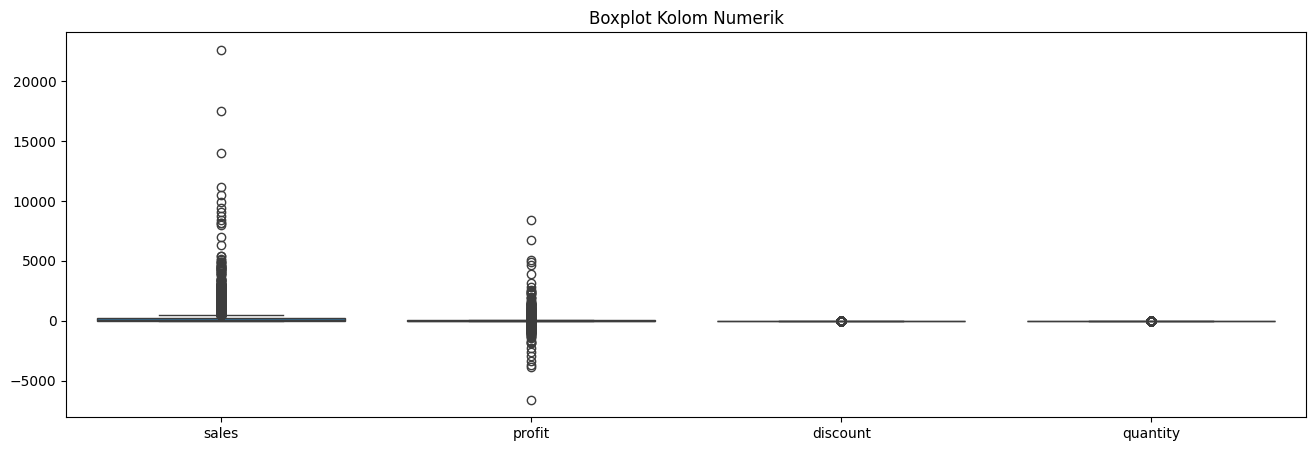

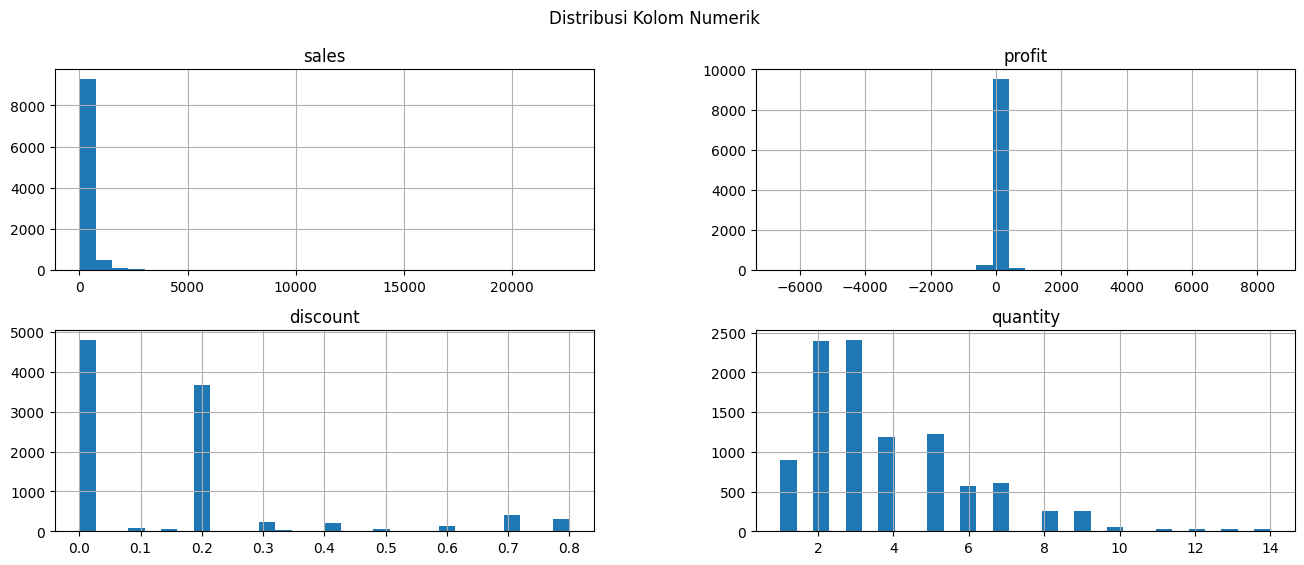

In [34]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot Kolom Numerik')
plt.show()

df[num_cols].hist(figsize=(16,6), bins=30)
plt.suptitle('Distribusi Kolom Numerik')
plt.show()

- Berdasarkan hasil boxplot, ditemukan Outlier utama ada pada Sales dan Profit.. Nilai-nilai tersebut dipertahankan karena dianggap valid secara bisnis.
- Diskon yang tinggi dan rendah tidak menunjukkan anomali karena masih dalam range yang masuk akal. Selain itu, ada data dengan diskon tinggi yang melebihi upper bound, menunjukkan mungkin memang sedang ada promo/kebijakan untuk diskon sebesar itu.
- Quantity tidak menunjukkan anomali, karena pemesanan dalam jumlah besar bisa terjadi dalam bisnis B2B.


#### Korelasi Antar Numeric Columns

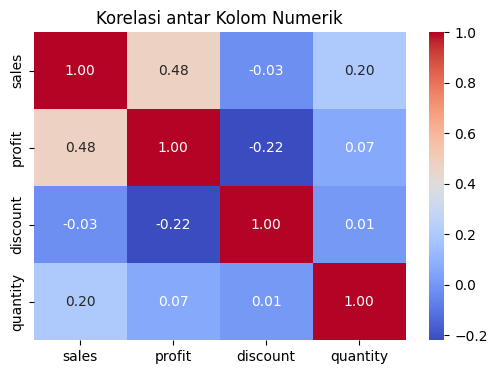

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Kolom Numerik')
plt.show()

- Korelasi profit dan sales sebesar 0.48, yang berarti ada korelasi positif sedang antara kedua variabel tersebut.


### **Distribusi Kategorikal**

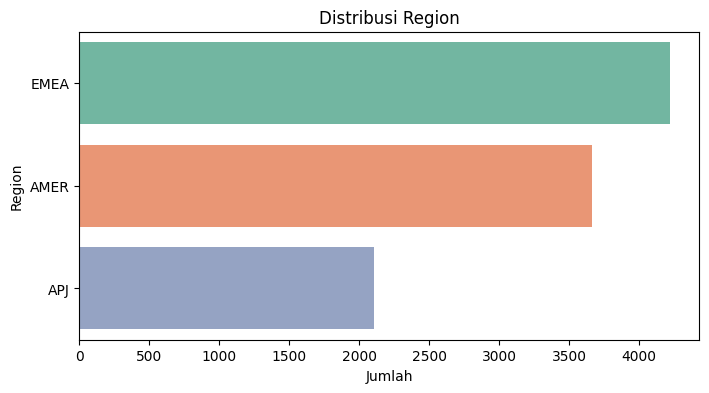

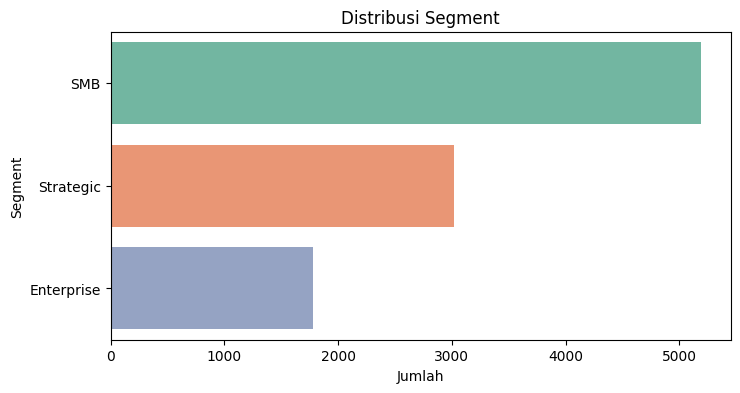

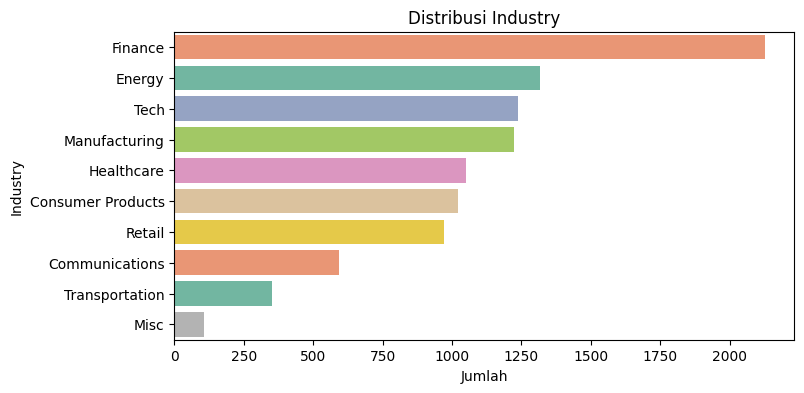

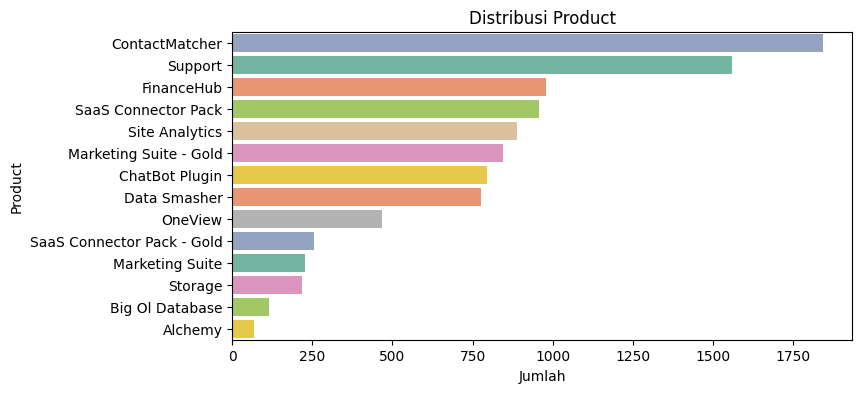

In [36]:
cat_cols = ['region', 'segment', 'industry', 'product']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index,hue=col, palette="Set2")
    plt.title(f'Distribusi {col.capitalize()}')
    plt.xlabel('Jumlah')
    plt.ylabel(col.capitalize())
    plt.show()

## Analisa Kinerja Penjualan 

### 1. Trend Sales dan Profit tiap Bulan per Tahun

In [37]:
#membuat kolom tahun dan bulan
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

In [38]:
#agregasi data per bulan dan tahun
monthly_trend = df.groupby(['year', 'month']).agg({'sales': 'sum', 'profit': 'sum'}).reset_index()
monthly_trend


,year,month,sales,profit
0,2020,1,13946.2290,2446.7711
1,2020,2,4810.5580,865.7280
2,2020,3,55691.0090,498.7299
3,2020,4,28013.9730,3500.8940
4,2020,5,23648.2870,2738.7096
5,2020,6,34595.1276,4976.5244
6,2020,7,33946.3930,-841.4826
7,2020,8,27909.4685,5318.1050
8,2020,9,81777.3508,8328.0994
9,2020,10,31453.3930,3448.2573


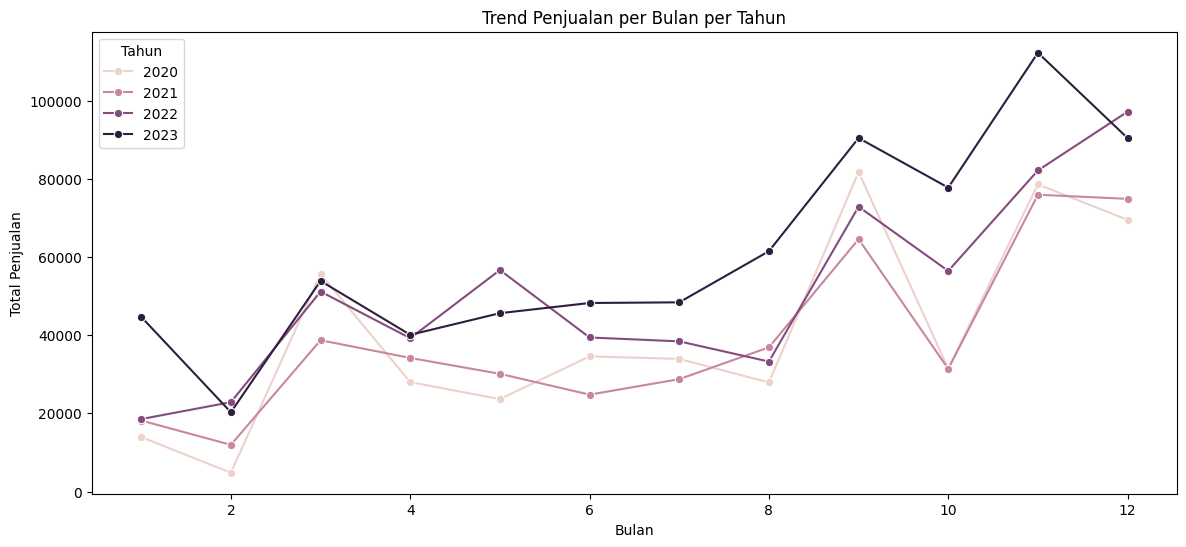

In [39]:
#visualisasi data sales per bulan tiap tahun
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='month', y='sales', hue='year', marker='o')
plt.title('Trend Penjualan per Bulan per Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks
plt.legend(title='Tahun')
plt.show()

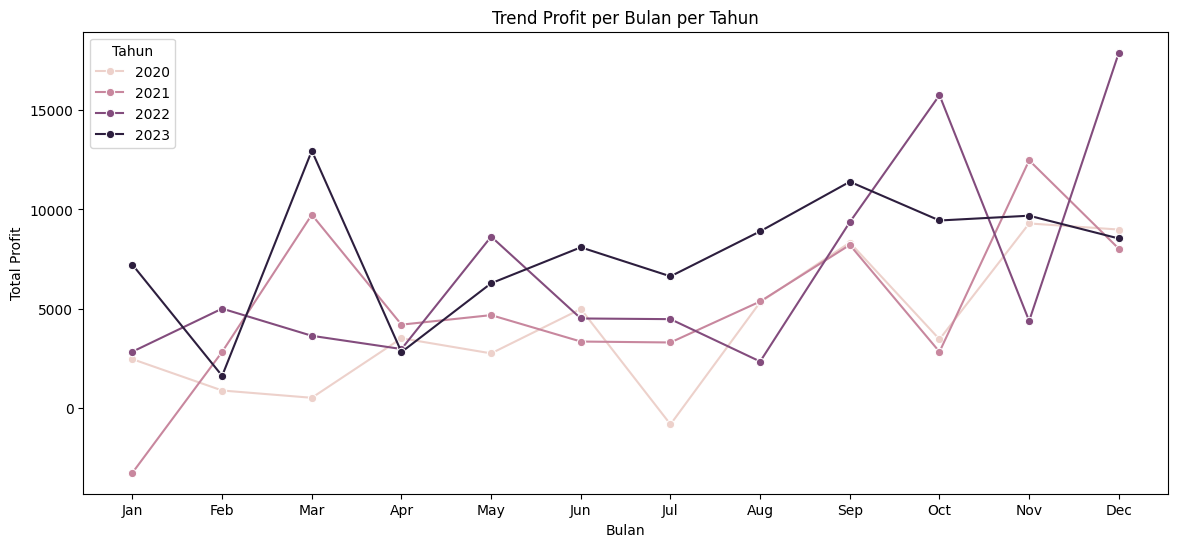

In [40]:
#visualisasi data profit per bulan tiap tahun
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='month', y='profit', hue='year', marker='o')
plt.title('Trend Profit per Bulan per Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Profit')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Tahun')
plt.show()

Kesimpulan Tren Sales dan Profit Bulanan per Tahun:
- Terlihat bahwa setiap tahun mengalami peningkatan tren penjualan di paruh akhir tahun (bulan 9–12). Dapat disebabkan karena adanya musim penjualan tinggi (peak season), mungkin karena promo akhir tahun, liburan, atau strategi pemasaran musiman.
- Tahun 2023 memiliki tingkat penjualan tertinggi secara keseluruhan dibanding 2020–2022. Hal ini menunjukkan pertumbuhan bisnis yang positif dari tahun ke tahun.
- Tahun 2020–2021 terlihat lebih rendah dan fluktuatif, yang kemungkinan disebabkan oleh pandemi, lalu mulai pulih di 2022–2023.
- Tren profit juga memperlihatkan pola serupa dengan penjualan yaitu naik di akhir tahun, dan turun di awal tahun.

### 2. Pengaruh Diskon terhadap Profit

#### Pengaruh Diskon terhadap Profit

In [41]:
#membuat kolom baru untuk memisahkan profit positif dan negatif
df['profit_type'] = np.where(df['profit'] >= 0, 'Positive', 'Negative')

In [42]:
#Korelasi diskon dan profit
correlation = df['discount'].corr(df['profit']).round(2)
correlation

np.float64(-0.22)

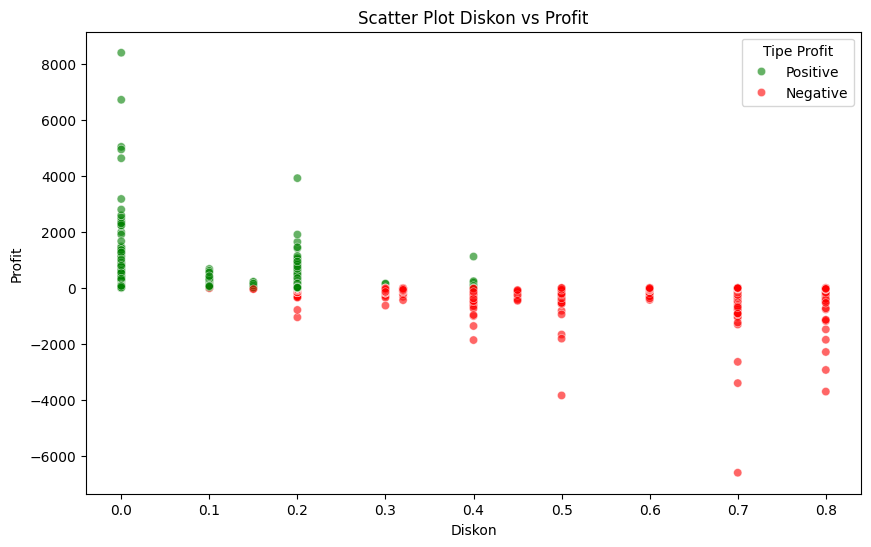

In [43]:
#visualisasi scatter plot diskon vs profit
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discount', y='profit', hue='profit_type', palette={'Negative': 'red', 'Positive': 'green'}, alpha=0.6)
plt.title('Scatter Plot Diskon vs Profit')
plt.xlabel('Diskon')
plt.ylabel('Profit')
plt.legend(title='Tipe Profit')
plt.show()

- Berdasarkan analisis, discount 30% ke atas cenderung memberikan rata-rata profit yang negatif. Hal ini menunjukkan bahwa diskon yang terlalu tinggi dapat merugikan perusahaan, sehingga perlu strategi diskon yang lebih bijak untuk menjaga profitabilitas.
- Korelasi antara diskon dan profit adalah -0.22, yang menunjukkan korelasi negatif lemah. Artinya, semakin tinggi diskon yang diberikan, cenderung semakin rendah profit yang diperoleh.

#### Distribusi Diskon tiap Produk

In [44]:
#Menghitung rata-rata Diskon per Produk
avg_discount_per_product = df.groupby('product').agg({
    'discount': 'mean',
    'profit': 'sum',
    'sales': 'sum',
    'order_id': 'count'
}).reset_index().rename(columns={'order_id': 'total_orders','profit': 'total_profit', 'discount': 'avg_discount', 'sales': 'total_sales'})

avg_discount_per_product.sort_values(by='total_orders', ascending=False)

,product,avg_discount,total_profit,total_sales,total_orders
3,ContactMatcher,0.353067,12496.2822,410378.2650,1842
13,Support,0.075128,32864.4698,125152.7440,1560
5,FinanceHub,0.132347,32148.4791,340654.0430,980
9,SaaS Connector Pack,0.138349,13059.1436,91705.1640,957
11,Site Analytics,0.154556,44515.7306,330007.0540,889
7,Marketing Suite - Gold,0.074704,21278.8264,223843.6080,846
2,ChatBot Plugin,0.074874,6527.7870,27118.7920,796
4,Data Smasher,0.078452,41936.6357,167380.3180,775
8,OneView,0.166524,18138.0054,107532.1610,466
10,SaaS Connector Pack - Gold,0.080315,6964.1767,16476.4020,254


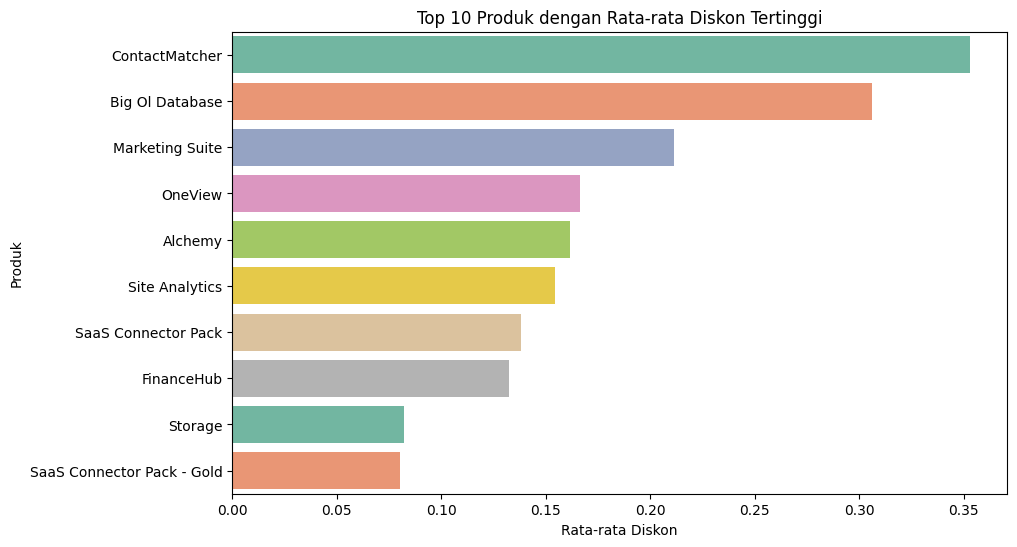

In [45]:
#Visualisasi top 10 produk dengan rata-rata diskon tertinggi
top_10_discounted_products = avg_discount_per_product.sort_values(by='avg_discount', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_discounted_products, x='avg_discount', y='product', palette='Set2')
plt.title('Top 10 Produk dengan Rata-rata Diskon Tertinggi')
plt.xlabel('Rata-rata Diskon')
plt.ylabel('Produk')
plt.show()

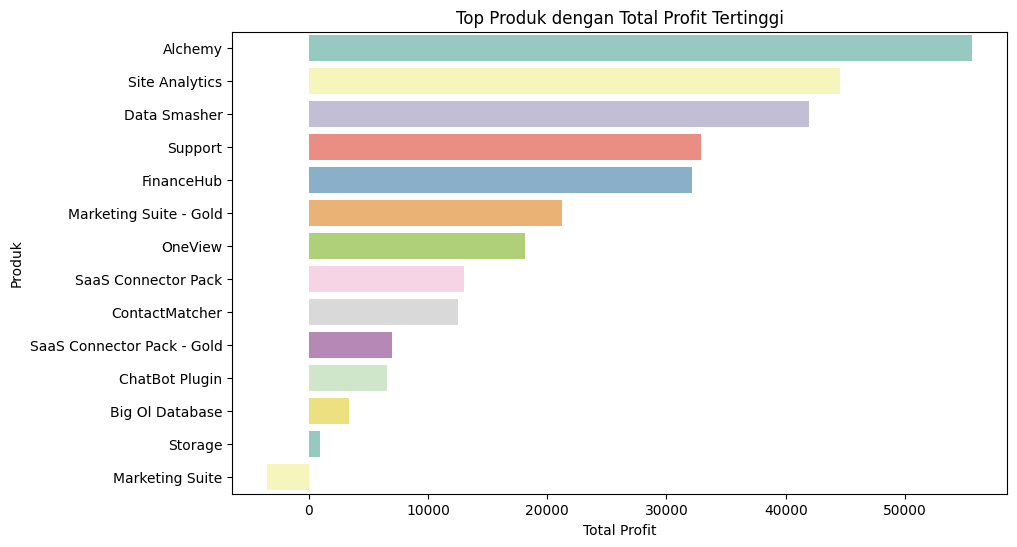

In [46]:
#Visualisasi produk dengan total profit
top_profitable_products = avg_discount_per_product.sort_values(by='total_profit', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_profitable_products, x='total_profit', y='product', palette='Set3')
plt.title('Top Produk dengan Total Profit Tertinggi')
plt.xlabel('Total Profit')
plt.ylabel('Produk')
plt.show()

- Berdasarkan hasil analisis, rata-rata diskon terbesar ada pada produk "Contact Matcher" sebesar 35%
- Selain itu produk "Marketing Suite" menjadi satu-satunya produk yang memiliki rata-rata profit negatif. Hal ini menunjukkan bahwa perlu adanya peninjauan ulang, seperti strategi pemasaran atau penetapan harga untuk produk tersebut agar dapat meningkatkan profitabilitasnya.

## LRFM Analysis

In [47]:
import datetime

analysis_date = df['order_date'].max() + datetime.timedelta(1)
analysis_date

Timestamp('2024-01-01 00:00:00')

### Length dan Recency

In [48]:
df_length_recency = df.groupby('customer_id').agg(
    length=('order_date', lambda x: (analysis_date - x.min()).days),
    recency=('order_date', lambda x: (analysis_date - x.max()).days),
)

df_length_recency.sample(5, random_state=32)

,length,recency
customer_id,,
1087,1280,8
1062,1443,28
1014,1431,5
1099,1450,3
1028,1366,13


- Apabila dilihat dari hasil tabel diatas, diketahui bahwa customer dengan customer_id 1099 sudah bergabung sejak 1450 hari yang lalu sedangkan CustomerID 1014 telah bergabung 1431 hari yang lalu.

- Dari segi recency, CustomerID 1099 terakhir berbelanja 3 hari yang lalu. Artinya customer 1099 baru saja melakukan transaksi. Sedangkan customer 1014 terakhir berbelanja 5 hari yang lalu melakukan transaksi terakhir, artinya customer ini baru melakukan bertransaksi.

### Frequency

Untuk mengetahui seberapa sering customer melakukan transaksi, dapat dianalisa dari nilai frekuensi pembelanjaan dari masing-masing customer

In [49]:
df_frequency = df.groupby('customer_id').agg(
    frequency=('order_id', lambda x: x.nunique())
)

df_frequency.sample(5, random_state=32)

,frequency
customer_id,
1087,56
1062,54
1014,49
1099,47
1028,65


- Kita mengetahui bahwa customer_id 1099 telah cukup lama bergabung, dilihat dari frekuensinya pelanggan ini berbelanja sebanyak 47 kali, sehingga dapat dikatakan frekuensinya  sering. 

- customer_id 1014 telah berbelanja selama 49 kali, sehingga dapat dikatakan frekuensinya sering.


### Monetary

Selanjutnya, monetary mengukur seberapa besar pengeluaran pelanggan dalam setiap transaksi. Nilai monetary dapat dihitung dari hasil perkalian antara harga barang yang dibeli dengan jumlah barang yang dibeli dalam satu kali transaksi. Untuk itu, kita akan membuat kolom total_price terlebih dahulu, yang menunjukkan hasil perkalian antara sales dan quantity.

In [50]:
df['total_price'] = df['quantity'] * df['sales']

Langkah selanjutnya adalah menjumlahkan total_price berdasarkan customer_id untuk mendapatkan total pengeluaran setiap pelanggan.

In [51]:
df_monetary = df.groupby('customer_id').agg(
    monetary=('sales', 'sum')
)
df_monetary.sample(5, random_state=32)

,monetary
customer_id,
1087,25352.5110
1062,19831.1580
1014,14296.1480
1099,23180.5442
1028,22780.1968


- Kembali ke customer_id 1099, pelanggan ini  melakukan 47 kali transaksi, dan nilai transaksi sebesar $23180.54. Sementara itu, customer_id 1014 memiliki total pengeluaran sebesar $14296.148 dari 49 transaksi yang dilakukan.

- Walaupun customer_id 1014 transaksi lebih banyak, tetapi jumlah nilai transaksi terpaut lumayan jauh dari customer_id 1099

Selanjutnya, semua informasi yang sudah diperoleh, yaitu length, recency, frequency, dan monetary, akan digabungkan dalam satu dataframe untuk memudahkan analisis segmentasi customer.

In [52]:
df_customer = df.groupby('customer_id').agg(
    length=('order_date', lambda x: (analysis_date - x.min()).days),
    recency=('order_date', lambda x: (analysis_date - x.max()).days),
    frequency=('order_id', lambda x: x.nunique()),    
    monetary=('sales', 'sum'),
)

df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary
customer_id,,,,
1087,1280,8,56,25352.5110
1062,1443,28,54,19831.1580
1014,1431,5,49,14296.1480
1099,1450,3,47,23180.5442
1028,1366,13,65,22780.1968


Berikut penjelasan dari masing-masing variabel diatas:

| Variable | Description |
| --- | --- |
| customer_id | ID customer nama perusahaan|
| length | Usia customer, diperoleh dari selisih hari pertama bertransaksi dengan hari analisis |
| recency | Selisih hari terakhir bertransaksi dengan hari analisis |
| frequency | Jumlah transaksi yang dilakukan oleh customer |
| monetary | Besar pengeluaran yang dilakukan oleh customer |

### Assign Scoring

#### Length Segmentation

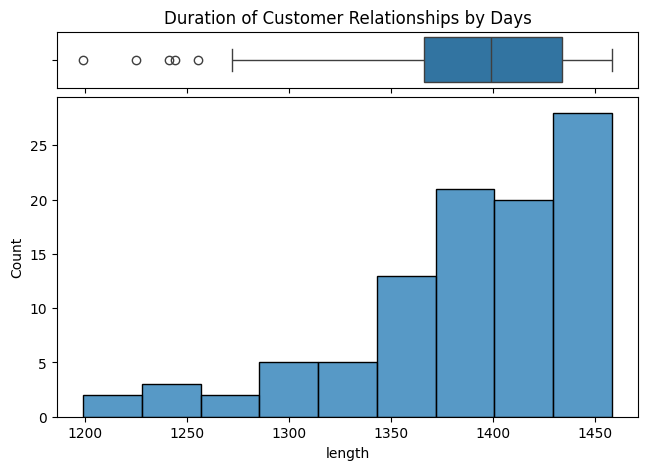

0.00    1199.0
0.25    1366.0
0.50    1399.0
0.75    1433.5
1.00    1458.0
Name: length, dtype: float64

In [53]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='length', ax=ax_top)
sns.histplot(data=df_customer, x='length', ax=ax_bot)

ax_top.set(
    title='Duration of Customer Relationships by Days'
)

plt.show()
display(df_customer['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan length-nya ke dalam 4 kelompok yaitu :
- 4 (Veteran) : telah bergabung lebih dari 1433.5 hari
- 3 (Loyal) : telah bergabung antara 1399 hingga 1433.5 hari terakhir
- 2 (Medium) : telah bergabung antara 1366 hingga 1398 hari terakhir
- 1 (Newbie) : bergabung kurang dari 1366 hari terakhir

In [54]:
df_customer['l_score'] = pd.qcut(
    df_customer['length'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary,l_score
customer_id,,,,,
1087,1280,8,56,25352.5110,1
1062,1443,28,54,19831.1580,4
1014,1431,5,49,14296.1480,3
1099,1450,3,47,23180.5442,4
1028,1366,13,65,22780.1968,1


#### Recency Segmentation

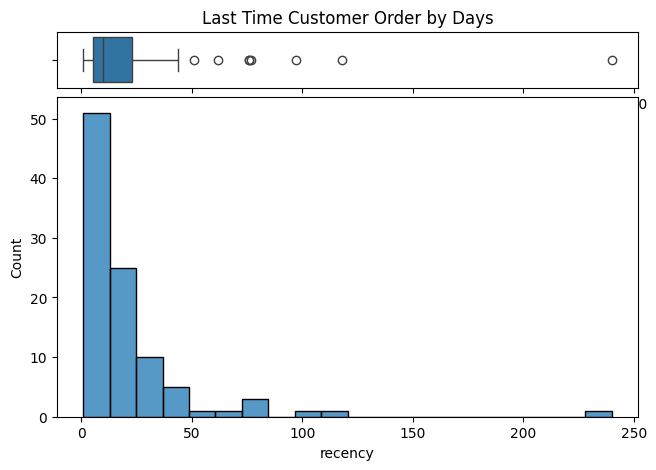

0.00      1.0
0.25      5.5
0.50     10.0
0.75     23.0
1.00    240.0
Name: recency, dtype: float64

In [55]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='recency', ax=ax_top)
sns.histplot(data=df_customer, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 5.5 hari terakhir
- 3 (Warm) : melakukan transaksi antara 5.5 hingga 10 hari terakhir
- 2 (Cold) : melakukan transaksi antara 11 hingga 23 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 23 hari terakhir

In [56]:
df_customer['r_score'] = pd.qcut(
    df_customer['recency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary,l_score,r_score
customer_id,,,,,,
1087,1280,8,56,25352.5110,1,3
1062,1443,28,54,19831.1580,4,1
1014,1431,5,49,14296.1480,3,4
1099,1450,3,47,23180.5442,4,4
1028,1366,13,65,22780.1968,1,2


#### Frequency Segmentation

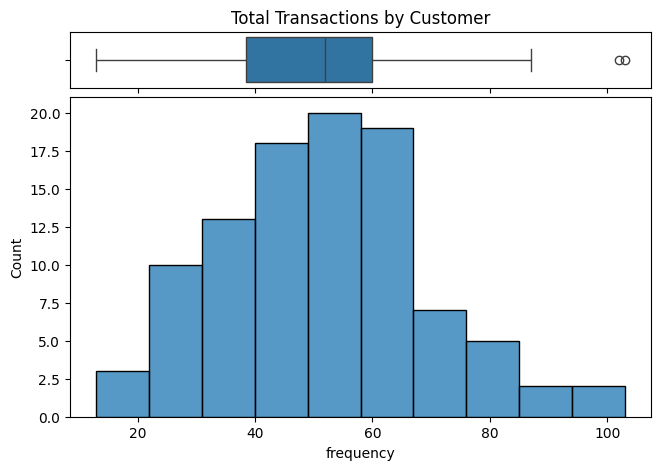

0.00     13.0
0.25     38.5
0.50     52.0
0.75     60.0
1.00    103.0
Name: frequency, dtype: float64

In [57]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan frequency-nya ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 59 kali
- 3 (High) : melakukan transaksi 53 hingga 59 kali
- 2 (Medium) : melakukan transaksi 38.5 hingga 52 kali
- 1 (Low) : melakukan transaksi kurang dari 38.5 kali.

In [58]:
def f_score(x):
    if x < 38.5:
        return 1
    elif x <= 52:
        return 2
    elif x <= 59:
        return 3
    else:
        return 4
    
df_customer['f_score'] = df_customer['frequency'].apply(f_score)
df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary,l_score,r_score,f_score
customer_id,,,,,,,
1087,1280,8,56,25352.5110,1,3,3
1062,1443,28,54,19831.1580,4,1,3
1014,1431,5,49,14296.1480,3,4,2
1099,1450,3,47,23180.5442,4,4,2
1028,1366,13,65,22780.1968,1,2,4


#### Monetary Segmentation

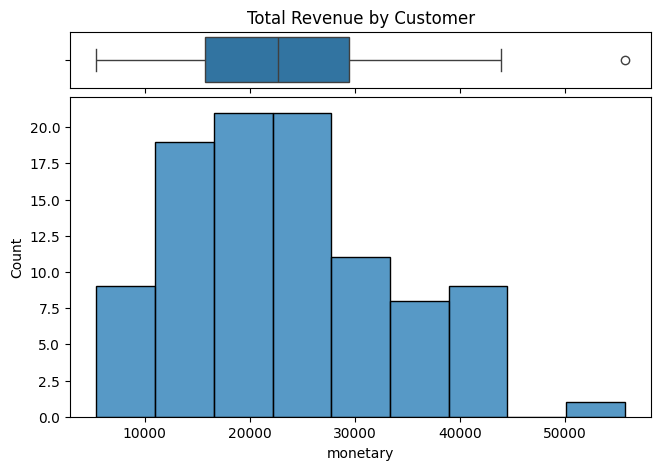

0.00     5402.9020
0.25    15692.6390
0.50    22650.8206
0.75    29486.2885
1.00    55719.2100
Name: monetary, dtype: float64

In [59]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='monetary', ax=ax_top)
sns.histplot(data=df_customer, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Spender) : melakukan transaksi lebih dari 29486.29 dollar
- 3 (High Spender) : melakukan transaksi antara 22650.82 hingga 29486.29 dollar
- 2 (Medium Spender) : melakukan transaksi antara 15692.64 hingga 22650.81 dollar
- 1 (Low Spender) : melakukan transaksi kurang dari dari 15692.64 dollar

In [60]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],            # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
customer_id,,,,,,,,
1087,1280,8,56,25352.5110,1,3,3,3
1062,1443,28,54,19831.1580,4,1,3,2
1014,1431,5,49,14296.1480,3,4,2,1
1099,1450,3,47,23180.5442,4,4,2,3
1028,1366,13,65,22780.1968,1,2,4,3


### Labelling Segment

Pada tahapan ini kita akan menggabungkan l_score, r_score, f_score, dan m_score menjadi lrfm_score_combined dengan cara Combining Individual Scores Approach

In [61]:
df_customer['lrfm_score_combined'] = df_customer['l_score'].astype(str) + df_customer['r_score'].astype(str) + df_customer['f_score'].astype(str) + df_customer['m_score'].astype(str)
df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined
customer_id,,,,,,,,,
1087,1280,8,56,25352.5110,1,3,3,3,1333
1062,1443,28,54,19831.1580,4,1,3,2,4132
1014,1431,5,49,14296.1480,3,4,2,1,3421
1099,1450,3,47,23180.5442,4,4,2,3,4423
1028,1366,13,65,22780.1968,1,2,4,3,1243


4 Segmen kita kelompokkan dengan ketentuan berikut:

In [62]:
seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'New Cust Low Value',
    r'[1-2][1-4][1-4][3-4]': 'New Cust High Value',
    r'[3-4][1-2][1-2][1-2]': 'Old Cust Inactive',
    r'[3-4][1-2][1-4][1-4]': 'At Risk', 
    r'[3-4][1-2][3-4][3-4]': 'Need Attention',
    r'[3-4][3-4][3-4][3-4]': 'Loyal Cust',
    r'[3-4][3-4][3-4][1-2]': 'Potensial Loyal Cust',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Old Cust'    
}
    
df_customer['lrfm_segment_combined'] = df_customer['lrfm_score_combined'].replace(seg_map, regex=True)
df_customer.sample(5, random_state=32)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
customer_id,,,,,,,,,,
1087,1280,8,56,25352.5110,1,3,3,3,1333,New Cust High Value
1062,1443,28,54,19831.1580,4,1,3,2,4132,At Risk
1014,1431,5,49,14296.1480,3,4,2,1,3421,Reactivated Old Cust
1099,1450,3,47,23180.5442,4,4,2,3,4423,Reactivated Old Cust
1028,1366,13,65,22780.1968,1,2,4,3,1243,New Cust High Value


In [63]:
df_customer.reset_index(inplace=True)
df_customer.head()

,customer_id,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
0,1001,1356,13,31,12617.1140,1,2,1,1,1211,New Cust Low Value
1,1002,1371,22,76,27278.5930,2,2,4,3,2243,New Cust High Value
2,1003,1412,2,61,39941.6400,3,4,4,4,3444,Loyal Cust
3,1004,1448,14,62,23189.2165,4,2,4,3,4243,At Risk
4,1005,1401,8,71,33514.9210,3,3,4,4,3344,Loyal Cust


In [64]:
#Merge dengan dataframe utama tapi hanya mengambil customer, industry, segment
customer_metadata = df[['customer_id', 'customer', 'industry', 'segment']].drop_duplicates()
customer_metadata.reset_index(inplace=True)
customer_metadata.head()
#drop column row_id
customer_metadata.drop(columns=['row_id'], axis=1, inplace=True)
customer_metadata.head()


,customer_id,customer,industry,segment
0,1017,Chevron,Energy,SMB
1,1056,Phillips 66,Energy,Strategic
2,1031,Royal Dutch Shell,Energy,SMB
3,1065,BNP Paribas,Finance,SMB
4,1062,Engie,Energy,SMB


In [65]:
lrfm_summary = pd.merge(df_customer, customer_metadata, on='customer_id', how='left')
lrfm_summary.rename(columns={'segment_x': 'lrfm_segment', 'segment_y': 'industry_segment'}, inplace=True)
lrfm_summary

,customer_id,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined,customer,industry,segment
0,1001,1356,13,31,12617.1140,1,2,1,1,1211,New Cust Low Value,Abbott Laboratories,Healthcare,Enterprise
1,1001,1356,13,31,12617.1140,1,2,1,1,1211,New Cust Low Value,Abbott Laboratories,Healthcare,SMB
2,1001,1356,13,31,12617.1140,1,2,1,1,1211,New Cust Low Value,Abbott Laboratories,Healthcare,Strategic
3,1002,1371,22,76,27278.5930,2,2,4,3,2243,New Cust High Value,Aetna,Healthcare,SMB
4,1002,1371,22,76,27278.5930,2,2,4,3,2243,New Cust High Value,Aetna,Healthcare,Strategic
5,1003,1412,2,61,39941.6400,3,4,4,4,3444,Loyal Cust,Allstate,Finance,Strategic
6,1003,1412,2,61,39941.6400,3,4,4,4,3444,Loyal Cust,Allstate,Finance,SMB
7,1003,1412,2,61,39941.6400,3,4,4,4,3444,Loyal Cust,Allstate,Finance,Enterprise
8,1004,1448,14,62,23189.2165,4,2,4,3,4243,At Risk,Amazon,Tech,SMB
9,1004,1448,14,62,23189.2165,4,2,4,3,4243,At Risk,Amazon,Tech,Strategic


###  Pelanggan Loyal dan Bernilai Tinggi Berdasarkan Frekuensi dan Nilai Pembelian

In [66]:
top_customers = lrfm_summary.groupby('customer').agg({
    'monetary': 'sum',
    'frequency': 'sum',
    'lrfm_segment_combined': lambda x: x.mode().iloc[0],
    'segment': lambda x: x.mode().iloc[0]
}).reset_index()

top_customers = top_customers.sort_values(by='monetary', ascending=False).head(10)
top_customers

,customer,monetary,frequency,lrfm_segment_combined,segment
10,Anthem,167157.6300,174,Loyal Cust,Enterprise
38,Ford Motor,131679.1272,309,New Cust High Value,Enterprise
16,Bank of America Corp.,123767.8413,195,New Cust High Value,Enterprise
92,Valero Energy,123661.2564,174,New Cust High Value,Enterprise
55,Lowes,121080.4890,174,Loyal Cust,Enterprise
5,Allstate,119824.9200,183,Loyal Cust,Enterprise
9,AmerisourceBergen,117704.2830,204,Loyal Cust,Enterprise
13,BMW,117251.3700,168,At Risk,Enterprise
14,BNP Paribas,112631.3994,243,New Cust High Value,Enterprise
80,Siemens,108025.1058,258,At Risk,Enterprise


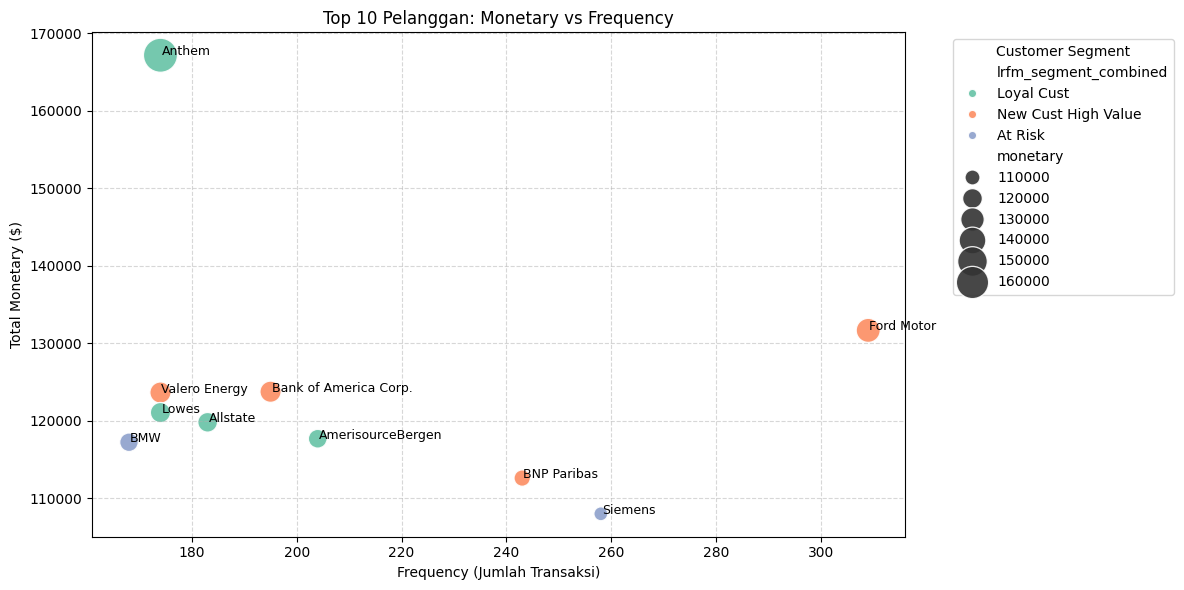

In [67]:
#scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=top_customers,
    x='frequency',
    y='monetary',
    hue='lrfm_segment_combined',
    size='monetary',
    sizes=(100, 600),
    palette='Set2',
    alpha=0.9)
for i, row in top_customers.iterrows():
    plt.text(row['frequency'] + 0.2, row['monetary'], row['customer'], fontsize=9)

plt.title('Top 10 Pelanggan: Monetary vs Frequency')
plt.xlabel('Frequency (Jumlah Transaksi)')
plt.ylabel('Total Monetary ($)')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Kesimpulan Pelanggan Top Spender :
- **Anthem** adalah pelanggan **dengan total sales** paling tinggi, walaupun frekuensi pembeliannya tidak terlalu tinggi, menunjukkan pembelian bernilai besar.
- **Ford Motor & Allianz** adalah pelanggan **paling aktif** dengan **frequency tertinggi** juga **total sales** kedua paling tinggi, menunjukkan loyalitas tinggi dan konsistensi transaksi.


Pelanggan dengan total sales tertinggi adalah Anthem, dengan total sales sebesar $167.157,63. Meskipun frekuensi pembeliannya tidak terlalu tinggi (hanya 174 kali), hal ini menunjukkan bahwa pembelian yang dilakukan oleh Anthem bernilai besar. Ini mengindikasikan bahwa Anthem adalah pelanggan yang melakukan pembelian dalam jumlah besar atau produk dengan harga tinggi, sehingga memberikan kontribusi signifikan terhadap pendapatan perusahaan.

Pelanggan paling sering bertransaksi adalah Ford Motor, dengan frekuensi 309 kali transaksi dan total sales $131.769,13. Menunjukkan bahwa Ford Motor adalah pelanggan yang sangat loyal dan aktif, serta memberikan kontribusi signifikan terhadap pendapatan perusahaan walaupun pelanggan ini bergabung belum terlalu lama. 

**Anthem** dan **Ford Motor** dapat dijadikan target utama untuk program loyalitas dan penawaran eksklusif guna mempertahankan hubungan bisnis yang kuat.


### Segmentasi Pelanggan

In [68]:
#jumlah transaksi yang dilakukan customer per lrfm_segment
segment_count = lrfm_summary['lrfm_segment_combined'].value_counts().reset_index()
segment_count

,lrfm_segment_combined,count
0,New Cust Low Value,85
1,New Cust High Value,48
2,Loyal Cust,39
3,At Risk,38
4,Reactivated Old Cust,27
5,Old Cust Inactive,20
6,Potensial Loyal Cust,6


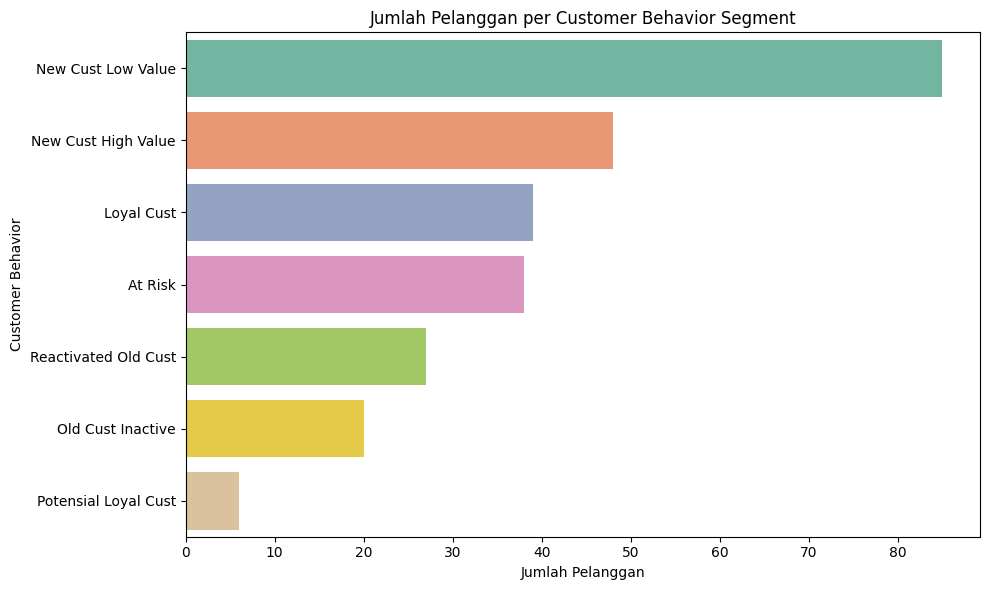

In [69]:
#visualisasi jumlah pelanggan per lrfm_segment
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=segment_count,
    x='count', y='lrfm_segment_combined',
    hue='lrfm_segment_combined',
    palette='Set2',
    ax=ax)
ax.set_title('Jumlah Pelanggan per Customer Behavior Segment')
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Customer Behavior')
plt.tight_layout()
plt.show()

In [70]:
#visualisasi total monetary tiap segment per lrfm_segment
monetary_segment = lrfm_summary.groupby('lrfm_segment_combined').agg({'monetary': 'sum'}).reset_index()
monetary_segment.sort_values(by='monetary', ascending=False, inplace=True)
monetary_segment

,lrfm_segment_combined,monetary
2,New Cust High Value,1.501676e+06
1,Loyal Cust,1.366407e+06
3,New Cust Low Value,1.315089e+06
0,At Risk,1.036967e+06
6,Reactivated Old Cust,5.523915e+05
4,Old Cust Inactive,2.941436e+05
5,Potensial Loyal Cust,1.132378e+05


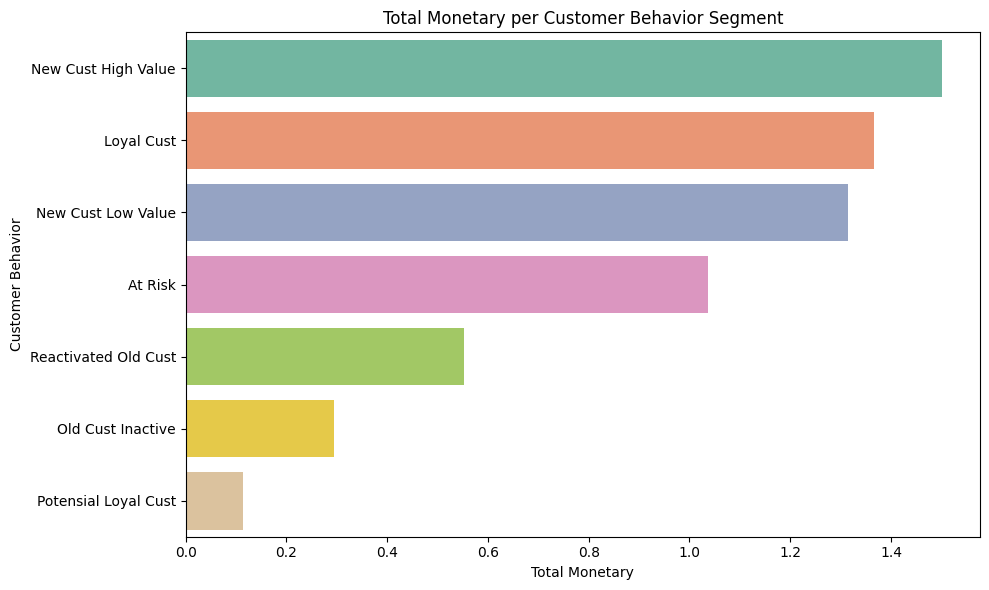

In [71]:
#visualisasi total monetary per lrfm_segment
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=monetary_segment,
    x='monetary', y='lrfm_segment_combined',
    hue='lrfm_segment_combined',
    palette='Set2',
    ax=ax)
ax.set_title('Total Monetary per Customer Behavior Segment')
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Total Monetary')
plt.ylabel('Customer Behavior')
plt.tight_layout()
plt.show()

In [72]:
segment_avg = lrfm_summary.groupby('lrfm_segment_combined').agg({'monetary': 'mean'}).reset_index()
segment_avg.sort_values(by='monetary', ascending=False, inplace=True)
segment_avg.columns = ['Customer Behavior', 'Avg Sales per Customer']

segment_avg

,Customer Behavior,Avg Sales per Customer
1,Loyal Cust,35036.086323
2,New Cust High Value,31284.919098
0,At Risk,27288.614661
6,Reactivated Old Cust,20458.945541
5,Potensial Loyal Cust,18872.972450
3,New Cust Low Value,15471.639865
4,Old Cust Inactive,14707.178660


Kesimpulan Segmentasi Pelanggan :
- Pelanggan baru mendominasi jumlah pelanggan (New Cust Low Value), tapi kontribusi nilai tertinggi justru datang dari New Cust High Value dan Loyal Customer. Bisa dilakukan fokus retensi pelanggan baru bernilai tinggi agar menjadi loyal jangka panjang.

- Loyal Customer punya rata-rata pembelian tertinggi, menunjukkan potensi profit jangka panjang yang kuat. Maka dari itu, harus dijaga dengan program loyalitas atau eksklusivitas.

- Segmen “At Risk” masih punya total transaksi yang cukup tinggi, bisa  dilakukan strategi reaktivasi sebelum benar-benar churn.

- Segmen “Old Cust Inactive” dan “Potential Loyal Cust” jumlah dan nilai transaksinya kecil, bisa jadi target untuk promosi ringan atau upselling.

## Save Dataset Clean

In [73]:
df.head()

,order_id,order_date,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,sales,quantity,discount,profit,year,month,profit_type,total_price
row_id,,,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,2022,11,Positive,523.9200
2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2022,11,Positive,2195.8200
3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,2022,6,Positive,29.2400
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,2021,10,Negative,4787.8875
5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,10,Positive,44.7360


In [74]:
df.to_csv("SaaS-Sales_clean.csv", index=False)

In [75]:
lrfm_summary.head()

,customer_id,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined,customer,industry,segment
0,1001,1356,13,31,12617.114,1,2,1,1,1211,New Cust Low Value,Abbott Laboratories,Healthcare,Enterprise
1,1001,1356,13,31,12617.114,1,2,1,1,1211,New Cust Low Value,Abbott Laboratories,Healthcare,SMB
2,1001,1356,13,31,12617.114,1,2,1,1,1211,New Cust Low Value,Abbott Laboratories,Healthcare,Strategic
3,1002,1371,22,76,27278.593,2,2,4,3,2243,New Cust High Value,Aetna,Healthcare,SMB
4,1002,1371,22,76,27278.593,2,2,4,3,2243,New Cust High Value,Aetna,Healthcare,Strategic


In [76]:
lrfm_summary.to_csv("lrfm_summary.csv", index=False)

## Kesimpulan dan Rekomendasi

### Kesimpulan

1. Analisis Kinerja Penjualan
- Analisis tren penjualan dan profit menunjukkan pertumbuhan bisnis yang positif dari 2020 ke 2023
- Penjualan dan profit sama-sama meningkat signifikan di akhir tahun, menandakan adanya pola musiman (Peak Season).
- Sebaliknya pada awal tahun, selalu menunjukkan adanya penurunan pada sales dan profit yang menandakan bahwa pada awal tahun merupakan Low Season.

2. Pengaruh Diskon terhadap Profit
- Berdasarkan analisis, diskon 30% ke atas cenderung memberikan rata-rata profit yang negatif. Hal ini menunjukkan bahwa diskon yang terlalu tinggi dapat merugikan perusahaan, sehingga perlu strategi diskon yang lebih bijak untuk menjaga profitabilitas.
- Korelasi antara diskon dan profit adalah -0.22, yang menunjukkan korelasi negatif lemah. Artinya, semakin tinggi diskon yang diberikan, cenderung semakin rendah profit yang diperoleh.
- Produk "Marketing Suite" menjadi satu-satunya produk yang memiliki rata-rata profit negatif. Hal ini menunjukkan bahwa perlu adanya peninjauan ulang, seperti strategi pemasaran atau penetapan harga untuk produk tersebut agar dapat meningkatkan profitabilitasnya.

3. Analisis LRFM
- Pelanggan baru mendominasi jumlah pelanggan (New Cust Low Value), tapi kontribusi nilai tertinggi justru datang dari New Cust High Value dan Loyal Customer. 
- Loyal Customer punya rata-rata pembelian tertinggi, menunjukkan potensi profit jangka panjang yang kuat. 
- Segmen “At Risk” masih punya total transaksi yang cukup tinggi.
- Segmen “Old Cust Inactive” dan “Potential Loyal Cust” jumlah dan nilai transaksinya kecil.
- **Anthem** dan **Ford Motor** dapat dijadikan target utama untuk program loyalitas dan penawaran eksklusif guna mempertahankan hubungan bisnis yang kuat.

### Rekomendasi

1. Optimalkan Strategi Pemasaran baik pada Akhir Tahun (Peak Season) ataupun Awal Tahun (Low Season)
- Luncurkan kampanye bertema musiman seperti Year-End Sale, Holiday Promo, atau Cashback Akhir Tahun untuk memaksimalkan momentum.
- Buat campaign khusus awal tahun seperti New Year Deals atau Product Refresh Discounts untuk menjaga arus penjualan agar tetap stabil di periode low season ini



2. Pengelolaan Diskon secara Strategis
- Berdasarkan analisis, diskon di atas 30% cenderung memberikan rata-rata profit negatif. Oleh karena itu, diskon di atas 30% sebaiknya dihindari atau jika memang diperlukan, harus diimbangi dengan strategi lain seperti bundling produk atau upselling untuk menjaga profitabilitas.
- Perusahaan harus fokus pada efektivitas diskon, memastikan bahwa diskon yang diberikan benar-benar mendorong penjualan tambahan tanpa mengorbankan margin keuntungan. Dari visualisasi diskon moderat (10-20%) memberikan rata-rata profit yang positif, sehingga diskon moderat ini dapat dipertimbangkan sebagai strategi diskon yang efektif.

3.  Segmentasi dan Aktivasi Pelanggan
- Fokus pada Pelanggan bernilai tinggi dan loyal, seperti "Anthem" dan "Ford Motor", dengan program loyalitas khusus, penawaran eksklusif, dan layanan pelanggan premium untuk mempertahankan hubungan bisnis yang kuat.
- Retensi Pelanggan Baru Bernilai Tinggi: Fokus pada retensi pelanggan baru yang memiliki nilai pembelian tinggi (New Cust High Value) dengan strategi onboarding yang efektif, penawaran khusus, dan komunikasi yang personal untuk mengubah mereka menjadi pelanggan loyal jangka panjang.
- Dorong repeat purchase cepat untuk New Cust Low Value dengan voucher pembelian kedua, edukasi produk, dan promosi personalisasi untuk membangun engagement awal.
- Lakukan reaktivasi campaign personal untuk Cust At Risk, supaya menghindari mereka benar-benar churn. Karena segment ini masih mempunyai kontribusi yang cukup besar dalam penjualan.